# TP images: convolutions, contours et points d'intérêts
## SSII - 2020-21
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [1]:
from skimage import io
from skimage import data
from skimage import transform
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
%matplotlib inline

## Image issue de la bibliothèque scikit-image

*section similaire au TP précédent*

In [3]:
#img = data.coffee()
img = data.chelsea()
#img = io.imread('/home/lingrand/Ens/SSII/Cours8-contours/carreNoir.png') #data.coffee()
# on peut sauver une image afin de la visualiser dans un autre outil
#io.imsave("coffee.png",img)

In [4]:
print(img.shape)

(300, 451, 3)


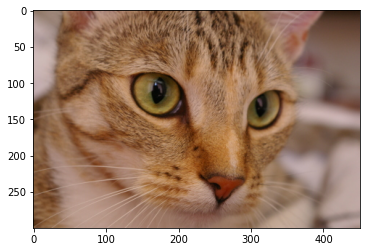

In [5]:
plt.imshow(img)

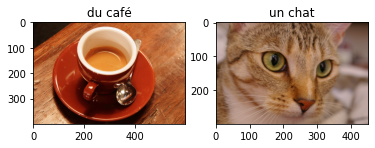

In [6]:
#une figure avec 2 images
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(data.coffee())
ax[0].title.set_text('du café')
ax[1].imshow(data.chelsea())
ax[1].title.set_text('un chat')

## Lissage par convolution

Nous allons commencer par utiliser une méthode simple pour la convolution 2D: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html">scipy.ndimage.convolve</a>.

Le lissage Gaussien s'effectue par la convolution avec le noyau $\frac{1}{16}\begin{pmatrix} 1 & 2 & 1\\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$.

Comme cet opérateur de convolution ne permet que de traiter un seul canal, on va récupérer chaque canal, appliquer la même convolution et recomposer une image couleur (imgLisse).

In [7]:
from scipy import ndimage

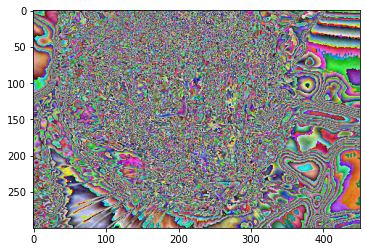

In [12]:
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgLisse = np.dstack((r,g,b))
plt.imshow(imgLisse)

L'image ci-dessus a des couleurs étranges. Quel est le problème ? Comment modifier ?

Cette image serait mieux!

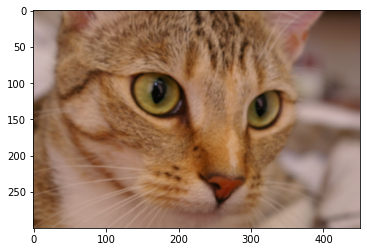

In [18]:
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgLisse = np.dstack((r,g,b))
plt.imshow(imgLisse)

## Contours par dérivée première

Un détecteur célèbre est celui de Sobel. Regardez les contours en x et en y avant de recomposer l'image résultat.

min =  0
max =  255
[246 246 245]


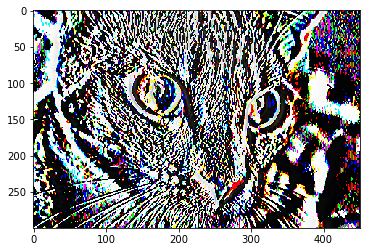

In [22]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = ndimage.convolve(img[:,:,0],sobelx)
g = ndimage.convolve(img[:,:,1],sobelx)
b = ndimage.convolve(img[:,:,2],sobelx)
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,400,:])

Si vous avez le moindre doute, essayez le détecteur sur une image simple, par exemple un carré noir sur fond blanc.

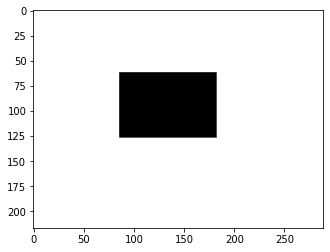

In [19]:
img = io.imread('index.png') 
plt.imshow(img)

<class 'numpy.ndarray'> (217, 289) <class 'numpy.uint8'> 0 255


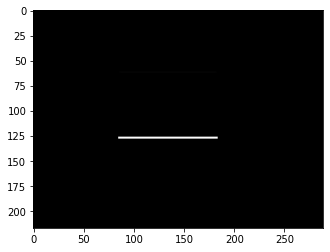

In [20]:
sobel_mag = ndimage.sobel(img[:,:,0], axis=0)
print(type(sobel_mag), sobel_mag.shape,type(sobel_mag[0][0]),sobel_mag.min(), sobel_mag.max())
plt.imshow(sobel_mag, cmap = plt.cm.gray )
#plt.imshow(np.abs(ndimage.sobel(img[:,:,0],axis=0)),cmap=plt.cm.gray) # ou axis =1

Pourquoi un seul contour horizontal ?


Et si on l'implémentait nous-même ?

In [32]:
# img est supposée à 1 canal et k de dimensions carrées impaires
# on va ignorer les problèmes au bord
def maConvolution(img, k):
    (h,w) = img.shape
    dimK = k.shape[0]
    d = dimK//2
    res = np.zeros(shape=(h,w), dtype=np.float64)
    for i in range(d, h-d):
        for j in range(d, w-d):
            for u in range(dimK):
                for v in range(dimK):
                    ## à vous d'ajouter la bonne ligne ICI
                    res[i][j] += img[i-d+u][j-d+v] * k[u][v]
                    
                    
    return res

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min =  0.0
max =  255.0
[0. 0. 0.]


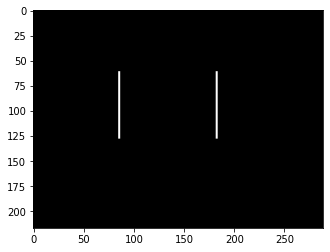

In [33]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = np.abs(maConvolution(img[:,:,0],sobelx))
g = np.abs(maConvolution(img[:,:,1],sobelx))
b = np.abs(maConvolution(img[:,:,2],sobelx))
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[216,288,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min =  0.0
max =  255.0
[0. 0. 0.]


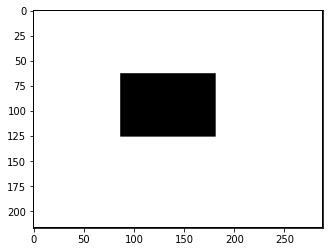

In [37]:
sobelx = np.array([[1,2,1],[2,4,2],[1,2,1]])/16.0
sobely = np.array([[1,2,1],[2,4,2],[1,2,1]])/16.0

r = np.abs(maConvolution(img[:,:,0],sobelx))
g = np.abs(maConvolution(img[:,:,1],sobelx))
b = np.abs(maConvolution(img[:,:,2],sobelx))
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[216,288,:])

Oublions donc ndimage pour Sobel et regardons scikit-image.

In [13]:
from skimage.filters import sobel

-1.0 1.0
<class 'numpy.float64'>


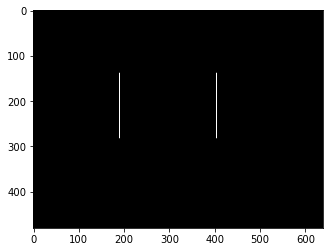

In [16]:
sobelx = sobel(img,axis=1) # ou axis = 0
print(sobelx.min(), sobelx.max())
plt.imshow(np.abs(sobelx))
print(type(sobelx[0][0][0]))

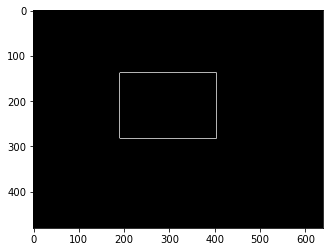

In [129]:
# on calcule maintenant la force du contour
sobel_mag = np.sqrt(sobel(img, axis=0)**2 + sobel(img, axis=1)**2)/math.sqrt(2)
plt.imshow(sobel_mag)

Regardez les contours de Sobel de plusieurs images de votre choix.

In [130]:
# pour vous

Testez d'autres filtres de contours par dérivée première comme par exemple celui de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.prewitt">Prewitt</a>.

In [ ]:
# pour vous

## Contours par dérivée seconde

Testez également le détecteur de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.laplace">Laplace</a>.

In [ ]:
# pour vous

## Contour par différence de gaussienne

Lissez de deux façons différentes une image et regardez la différence (en valeur absolue).

In [ ]:
# pour vous

## Seuillage des points de contours.

Testez le seuillage simple ou avec <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.apply_hysteresis_threshold">hystérésis</a>. Est-il aisé de trouver la ou les bonnes valeurs de seuils ?

In [ ]:
# pour vous

## Points d'intérêt

### Harris

Commençons par Harris:

In [38]:
from skimage.feature import corner_harris, corner_peaks

In [42]:
img=data.chelsea()
pts=corner_peaks(corner_harris(img[:,:,1]), min_distance=1)
print( pts.shape[0], ' points found')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.scatter(y=pts[:,0],x=pts[:,1],c='r',s=10)
plt.show()

NameError: name 'corner_peaks' is not defined

Comment ajouter des points d'intérêt ? Examinez les paramètres par défaut.

### SIFT

Testons SIFT: pour cela, nous pouvons utiliser l'implémentation de OpenCV. Il faudra cependant installer la librairie.

In [38]:
# si nécessaire, installation :
#            !pip install opencv-contrib-python

import cv2
print(cv2.__version__)

4.5.5


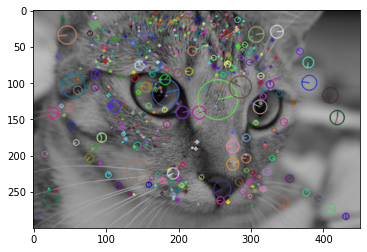

In [41]:
img=data.chelsea()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)